In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe
from itertools import combinations 
from matplotlib import animation
from scipy.spatial.distance import cdist


In [ ]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 0.7, dst = False, vortex = True)

Total Imag Time:  1.3024547100067139
kmax:  4.0212385965949355
T:  5.659625947760682


In [37]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)
circ_frames = np.zeros((len(g.snaps), len(g.snaps[0])//2, len(g.snaps[0])//2))
vort = []
avort = []
for i in range(len(g.snaps)): 
    detection = pt.detectVortices(tracker, g.snaps[i])
    circ_frames[i] = detection[2] 
    vort.append(detection[0]) 
    avort.append(detection[1])

In [38]:
# try with just two vortices 

def animatepsi2(filename): 
    time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')
    plt.colorbar() 
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(np.abs(g.snaps[i])**2)
        # loop over the existing points 
        #print(vort_arr[0])
        #v1.set_offsets([antiv_traj_arr[0][i][0]+0.5-L/2, antiv_traj_arr[0][i][1]+0.5-L/2])
        #v2.set_offsets([antiv_traj_arr[1][i][0]+0.5-L/2, antiv_traj_arr[1][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
    anim.save(path)
    plt.show() 

    return anim 
    

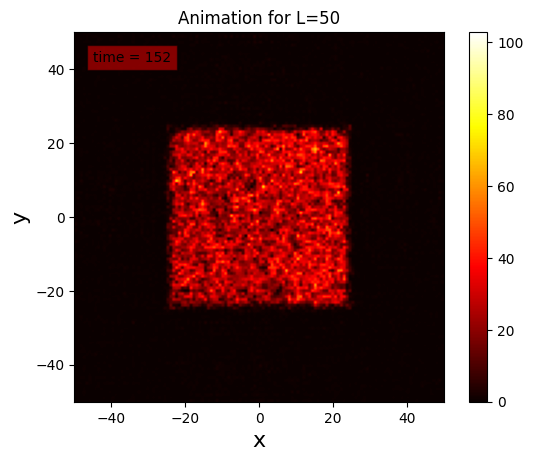

In [39]:
animatepsi2('test3.mp4')

In [40]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

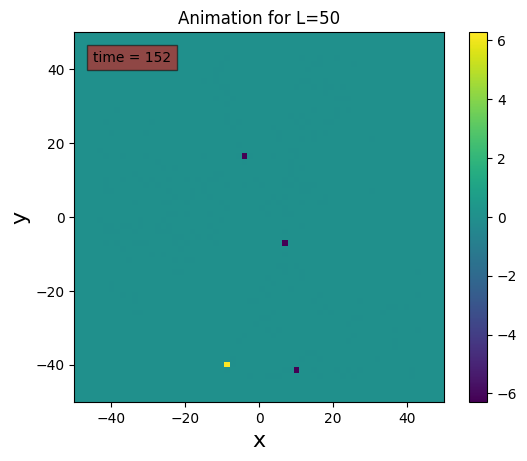

In [41]:
generalAnimation('circ5.mp4', circ_frames)

In [42]:
print(np.shape(circ_frames))

(2001, 64, 64)


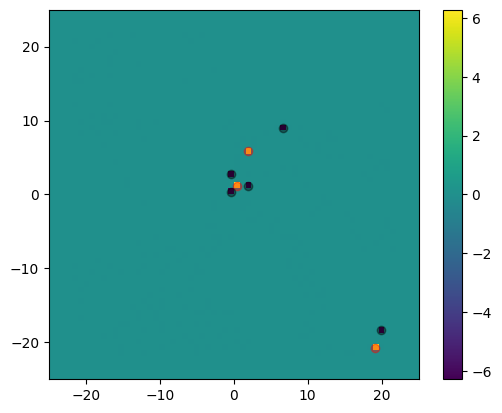

In [43]:
s = 400

plt.imshow(circ_frames[s], origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
plt.colorbar() 
for i in range(len(vort[s])): 
    plt.scatter(*vort[s][i]-g.L/2, alpha = 0.4, color = 'red') 
for i in range(len(avort[s])): 
    plt.scatter(*avort[s][i]-g.L/2, alpha = 0.4, color = 'black')

In [44]:
def track_vortices_across_frames(frames, max_dist=5):
    """
    frames: list of lists of (x, y) tuples
    Returns: dict {vortex_id: [(t, x, y), ...]}
    """
    next_id = 0
    tracks = {}  # {id: [(t, x, y)]}
    prev_positions = {}  # {id: (x, y)}

    # Initialize with frame 0
    for coord in frames[0]:
        tracks[next_id] = [(0, *coord)]
        prev_positions[next_id] = coord
        next_id += 1

    for t in range(1, len(frames)):
        current_coords = np.array(frames[t])
        if len(current_coords) == 0:
            continue

        # Match to previous positions using nearest neighbors
        prev_ids = list(prev_positions.keys())
        prev_coords = np.array([prev_positions[i] for i in prev_ids])

        distance_matrix = cdist(prev_coords, current_coords)
        matched_ids = set()
        used_indices = set()
        new_prev_positions = {}

        for i, row in enumerate(distance_matrix):
            j = np.argmin(row)
            if row[j] < max_dist and j not in used_indices:
                vortex_id = prev_ids[i]
                x, y = current_coords[j]
                tracks[vortex_id].append((t, x, y))
                new_prev_positions[vortex_id] = (x, y)
                matched_ids.add(vortex_id)
                used_indices.add(j)

        # Add new vortices (unmatched)
        for j, coord in enumerate(current_coords):
            if j not in used_indices:
                tracks[next_id] = [(t, *coord)]
                new_prev_positions[next_id] = coord
                next_id += 1

        prev_positions = new_prev_positions

        # print(f"\nFrame {t}")
        # for i, vortex_id in enumerate(prev_ids):
        #     if vortex_id in new_prev_positions:
        #         print(f"Vortex {vortex_id} → {new_prev_positions[vortex_id]}")

    return tracks

def compute_distance_between_tracks(track1, track2):
    distances = []
    for (t1, x1, y1), (t2, x2, y2) in zip(track1, track2):
        if t1 == t2:
            dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            distances.append((t1, dist))
    return distances

def plot_distance_over_time(distances):
    if not distances:
        print("No overlapping time points to compute distance.")
        return
    times, dists = zip(*distances)
    plt.plot(times, dists, marker='o')
    plt.xlabel("Frame")
    plt.ylabel("Distance")
    plt.title("Distance Between Vortices Over Time")
    plt.grid(True)
    plt.show()


In [45]:
# Example synthetic data

tracks = track_vortices_across_frames(avort)

# # Print tracked paths
# for vortex_id, path in tracks.items():
#     print(f"Vortex {vortex_id}: {path}")

# Choose two IDs (e.g., the two that were there from frame 0)
ids = sorted(tracks, key=lambda k: len(tracks[k]), reverse=True)[:2]
track1 = tracks[ids[0]]
track2 = tracks[ids[1]]

# Compute and plot distance
distances = compute_distance_between_tracks(track1, track2)
plot_distance_over_time(distances)


No overlapping time points to compute distance.


In [46]:
# Print tracked paths
for vortex_id, path in tracks.items():
    print(f"Vortex {vortex_id}: {path}")

Vortex 0: [(0, 24.609375, 24.609375), (1, 24.609375, 24.609375), (2, 24.609375, 24.609375), (3, 24.609375, 24.609375), (4, 24.609375, 24.609375), (5, 24.609375, 24.609375), (6, 24.609375, 24.609375), (7, 24.609375, 25.390625), (8, 24.609375, 25.390625), (9, 24.609375, 25.390625), (10, 25.390625, 25.390625), (11, 25.390625, 25.390625), (12, 26.171875, 25.390625), (13, 27.734375, 25.390625), (14, 27.734375, 24.609375), (15, 27.734375, 24.609375), (16, 27.734375, 24.609375), (17, 26.953125, 24.609375), (18, 26.953125, 24.609375), (19, 26.953125, 24.609375), (20, 26.953125, 24.609375), (21, 26.953125, 24.609375), (22, 26.953125, 24.609375), (23, 26.953125, 24.609375), (24, 26.171875, 24.609375), (25, 26.171875, 24.609375), (26, 26.171875, 24.609375), (27, 26.171875, 23.828125), (28, 25.390625, 23.046875), (29, 25.390625, 23.046875), (30, 25.390625, 23.046875), (31, 24.609375, 23.046875), (32, 24.609375, 23.046875), (33, 24.609375, 23.046875), (34, 24.609375, 23.046875), (35, 24.609375, 23.

In [48]:
print(np.shape(circ_frames))

(2001, 64, 64)


In [1]:
time = 12
plt.imshow(circ_frames[time], origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
for i in range(len(tracks)): 
    for j in range(len(tracks[i])): 
        if tracks[i][j][0] == time: 
            print(i)
            plt.scatter(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, alpha = 0.2, color = 'red')
            plt.text(tracks[i][j][1]-g.L/2, tracks[i][j][2]-g.L/2, i)

NameError: name 'plt' is not defined

There is an issue with assigning labels to vortices that spontaneously appear and then these disappear... let's try the averaging method discussed last week and try to implement that. Also put the above algorithm in the tracking class code. 